# K-means clustering

In [ ]:
Natalia Rodríguez González A01639990

# Importing libraries

In [8]:
# Import the packages that we will be using
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [9]:
# url string that hosts our .csv file
url = "datasets/iris/iris.csv"

# Read the .csv file and store it as a pandas Data Frame
dataset1 = pd.read_csv(url)
dataset2 = pd.read_csv(url)
dataset3 = pd.read_csv(url)
dataset1.columns=["Sepal_length_in_cm","Sepal_width_in_cm", "Petal_length_in_cm", "Petal_width_in_cm", "Class"]
dataset2.columns=["Sepal_length_in_cm","Sepal_width_in_cm", "Petal_length_in_cm", "Petal_width_in_cm", "Class"]
dataset3.columns=["Sepal_length_in_cm","Sepal_width_in_cm", "Petal_length_in_cm", "Petal_width_in_cm", "Class"]

# Undertanding and preprocessing the data

In [10]:
print(dataset1.shape)

dataset1.head()

(149, 5)


,Sepal_length_in_cm,Sepal_width_in_cm,Petal_length_in_cm,Petal_width_in_cm,Class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [11]:
#Drop rows with any missing values
dataset1 = dataset1.dropna()

print(dataset1.shape)

(149, 5)


In [12]:
#Encoding the class label categorical column: from string to num
# Encoding the categorical column
dataset1 = dataset1.replace({"Class":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })
dataset2 = dataset2.replace({"Class":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })
dataset3 = dataset3.replace({"Class":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

#Visualize the dataset
dataset1

# Note: this is not neesary for the cartwheel dataset, but it going to be very usefull for the Iris dataset

,Sepal_length_in_cm,Sepal_width_in_cm,Petal_length_in_cm,Petal_width_in_cm,Class
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2


In [13]:
#Discard columns that won't be used
# Drop out non necesary columns
dataset1.drop(['Sepal_length_in_cm', 'Sepal_width_in_cm'],axis='columns',inplace=True)
dataset2.drop(['Petal_length_in_cm', 'Petal_width_in_cm'],axis='columns',inplace=True)

#Visualize the dataset
dataset1

,Petal_length_in_cm,Petal_width_in_cm,Class
0,1.4,0.2,0
1,1.3,0.2,0
2,1.5,0.2,0
3,1.4,0.2,0
4,1.7,0.4,0
...,...,...,...
144,5.2,2.3,2
145,5.0,1.9,2
146,5.2,2.0,2
147,5.4,2.3,2


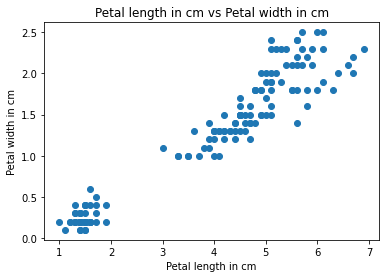

In [14]:
#Scatter plot of the data
plt.scatter(dataset1.Petal_length_in_cm,dataset1.Petal_width_in_cm)
plt.title('Petal length in cm vs Petal width in cm')
plt.xlabel('Petal length in cm')
plt.ylabel('Petal width in cm')
plt.show()

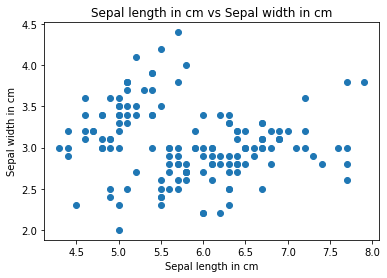

In [15]:
#Scatter plot of the data
plt.scatter(dataset2.Sepal_length_in_cm,dataset2.Sepal_width_in_cm)
plt.title('Sepal length in cm vs Sepal width in cm')
plt.xlabel('Sepal length in cm')
plt.ylabel('Sepal width in cm')
plt.show()

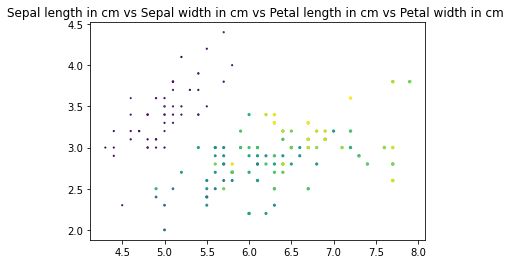

In [17]:
plt.scatter(dataset3.Sepal_length_in_cm,dataset3.Sepal_width_in_cm, dataset3.Petal_length_in_cm,dataset3.Petal_width_in_cm)
plt.title('Sepal length in cm vs Sepal width in cm vs Petal length in cm vs Petal width in cm ')
plt.show()

<ipython-input-18-9a17c1310be8>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.Petal_length_in_cm, df1.Petal_width_in_cm, Label='Class 0')
<ipython-input-18-9a17c1310be8>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.Petal_length_in_cm, df2.Petal_width_in_cm, Label='Class 1')
<ipython-input-18-9a17c1310be8>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.Petal_length_in_cm, df3.Petal_width_in_cm, Label='Class 2')


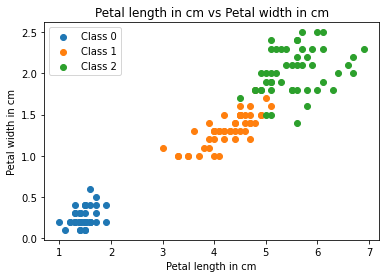

In [18]:
#Scatter plot of the data asigning each point to the cluster it belongs to ¡¡
df1 = dataset1[dataset1.Class==0]
df2 = dataset1[dataset1.Class==1]
df3 = dataset1[dataset1.Class==2]

plt.scatter(df1.Petal_length_in_cm, df1.Petal_width_in_cm, Label='Class 0')
plt.scatter(df2.Petal_length_in_cm, df2.Petal_width_in_cm, Label='Class 1')
plt.scatter(df3.Petal_length_in_cm, df3.Petal_width_in_cm, Label='Class 2')

plt.title('Petal length in cm vs Petal width in cm')
plt.xlabel('Petal length in cm')
plt.ylabel('Petal width in cm')
plt.legend()
plt.show()

<ipython-input-20-4cbc6db694e6>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df21.Sepal_length_in_cm, df21.Sepal_width_in_cm, Label='Class 0')
<ipython-input-20-4cbc6db694e6>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df22.Sepal_length_in_cm, df22.Sepal_width_in_cm, Label='Class 1')
<ipython-input-20-4cbc6db694e6>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df23.Sepal_length_in_cm, df23.Sepal_width_in_cm, Label='Class 2')


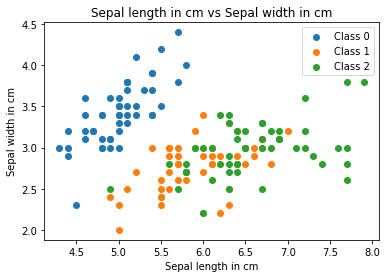

In [20]:
#Scatter plot of the data asigning each point to the cluster it belongs to ¡¡
df21 = dataset2[dataset2.Class==0]
df22 = dataset2[dataset2.Class==1]
df23 = dataset2[dataset2.Class==2]

plt.scatter(df21.Sepal_length_in_cm, df21.Sepal_width_in_cm, Label='Class 0')
plt.scatter(df22.Sepal_length_in_cm, df22.Sepal_width_in_cm, Label='Class 1')
plt.scatter(df23.Sepal_length_in_cm, df23.Sepal_width_in_cm, Label='Class 2')

plt.title('Sepal length in cm vs Sepal width in cm')
plt.xlabel('Sepal length in cm')
plt.ylabel('Sepal width in cm')
plt.legend()
plt.show()

<ipython-input-26-8113774d3729>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df31.Sepal_length_in_cm, df31.Sepal_width_in_cm, df31.Petal_length_in_cm, df31.Petal_width_in_cm, Label='Class 0')
<ipython-input-26-8113774d3729>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df32.Sepal_length_in_cm, df32.Sepal_width_in_cm, df32.Petal_length_in_cm, df32.Petal_width_in_cm, Label='Class 1')
<ipython-input-26-8113774d3729>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df33.Sepal_length_in_cm, df33.Sepal_width_in_cm, df33.Petal_length_in_cm, df33.Petal_width_in_cm,Label='Class 2')


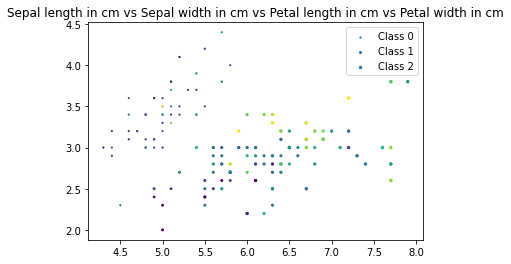

In [26]:
df31 = dataset3[dataset3.Class==0]
df32 = dataset3[dataset3.Class==1]
df33 = dataset3[dataset3.Class==2]

plt.scatter(df31.Sepal_length_in_cm, df31.Sepal_width_in_cm, df31.Petal_length_in_cm, df31.Petal_width_in_cm, Label='Class 0')
plt.scatter(df32.Sepal_length_in_cm, df32.Sepal_width_in_cm, df32.Petal_length_in_cm, df32.Petal_width_in_cm, Label='Class 1')
plt.scatter(df33.Sepal_length_in_cm, df33.Sepal_width_in_cm, df33.Petal_length_in_cm, df33.Petal_width_in_cm,Label='Class 2')

plt.title('Sepal length in cm vs Sepal width in cm vs Petal length in cm vs Petal width in cm')
plt.legend()
plt.show()

# Kmeans clustering

In [34]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km1 = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
yp1 = km1.fit_predict(dataset1[['Petal_length_in_cm','Petal_width_in_cm']])

# Print estimated cluster of each point in the dataser
yp1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [35]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km2 = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
yp2 = km2.fit_predict(dataset2[['Sepal_length_in_cm','Sepal_width_in_cm']])

# Print estimated cluster of each point in the dataser
yp2

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [36]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km3 = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
yp3 = km3.fit_predict(dataset3[['Sepal_length_in_cm','Sepal_width_in_cm','Petal_length_in_cm','Petal_width_in_cm' ]])

# Print estimated cluster of each point in the dataser
yp3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [37]:
# Add a new column to the dataset with the cluster information
dataset1['Cluster1'] = yp1

# Visualize the dataset
dataset1

,Petal_length_in_cm,Petal_width_in_cm,Class,Cluster1
0,1.4,0.2,0,0
1,1.3,0.2,0,0
2,1.5,0.2,0,0
3,1.4,0.2,0,0
4,1.7,0.4,0,0
...,...,...,...,...
144,5.2,2.3,2,1
145,5.0,1.9,2,1
146,5.2,2.0,2,1
147,5.4,2.3,2,1


In [38]:
# Add a new column to the dataset with the cluster information
dataset2['Cluster2'] = yp2

# Visualize the dataset
dataset2

,Sepal_length_in_cm,Sepal_width_in_cm,Class,Cluster2
0,4.9,3.0,0,2
1,4.7,3.2,0,2
2,4.6,3.1,0,2
3,5.0,3.6,0,2
4,5.4,3.9,0,2
...,...,...,...,...
144,6.7,3.0,2,0
145,6.3,2.5,2,1
146,6.5,3.0,2,0
147,6.2,3.4,2,0


In [39]:
# Add a new column to the dataset with the cluster information
dataset3['Cluster3'] = yp3

# Visualize the dataset
dataset3

,Sepal_length_in_cm,Sepal_width_in_cm,Petal_length_in_cm,Petal_width_in_cm,Class,Cluster3
0,4.9,3.0,1.4,0.2,0,1
1,4.7,3.2,1.3,0.2,0,1
2,4.6,3.1,1.5,0.2,0,1
3,5.0,3.6,1.4,0.2,0,1
4,5.4,3.9,1.7,0.4,0,1
...,...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2,0
145,6.3,2.5,5.0,1.9,2,2
146,6.5,3.0,5.2,2.0,2,0
147,6.2,3.4,5.4,2.3,2,0


In [40]:
# Visualize the ID of the clusters
dataset1.Cluster1.unique()

array([0, 2, 1])

In [41]:
# Visualize the ID of the clusters
dataset2.Cluster2.unique()

array([2, 0, 1])

In [42]:
# Visualize the ID of the clusters
dataset3.Cluster3.unique()

array([1, 2, 0])

In [24]:
# Center of each cluster
km1.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.46326531, 0.24693878],
       [4.26923077, 1.34230769]])

In [43]:
km2.cluster_centers_

array([[6.81276596, 3.07446809],
       [5.77358491, 2.69245283],
       [5.00408163, 3.42653061]])

In [44]:
km3.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.00408163, 3.42653061, 1.46326531, 0.24693878],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [45]:
# Sum of squared error
km1.inertia_

31.3652773417059

In [46]:
km2.inertia_

37.03639600521062

In [47]:
km3.inertia_

78.83105367104396

# Plot estimated clusters

<ipython-input-49-b6454e7acf94>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.Petal_length_in_cm, df1.Petal_width_in_cm, Label='Estimated Class 1')
<ipython-input-49-b6454e7acf94>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.Petal_length_in_cm, df2.Petal_width_in_cm, Label='Estimated Class 2')
<ipython-input-49-b6454e7acf94>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.Petal_length_in_cm, df3.Petal_width_in_cm, Label='Estimated Class 3')


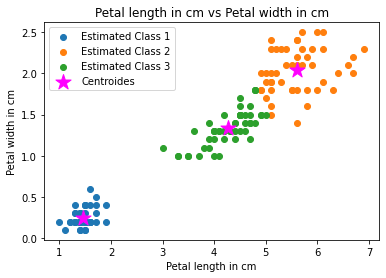

In [49]:
df1 = dataset1[dataset1.Cluster1==0]
df2 = dataset1[dataset1.Cluster1==1]
df3 = dataset1[dataset1.Cluster1==2]

plt.scatter(df1.Petal_length_in_cm, df1.Petal_width_in_cm, Label='Estimated Class 1')
plt.scatter(df2.Petal_length_in_cm, df2.Petal_width_in_cm, Label='Estimated Class 2')
plt.scatter(df3.Petal_length_in_cm, df3.Petal_width_in_cm, Label='Estimated Class 3')

plt.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('Petal length in cm vs Petal width in cm')
plt.xlabel('Petal length in cm')
plt.ylabel('Petal width in cm')
plt.legend()
plt.show()

<ipython-input-50-9a17c1310be8>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.Petal_length_in_cm, df1.Petal_width_in_cm, Label='Class 0')
<ipython-input-50-9a17c1310be8>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.Petal_length_in_cm, df2.Petal_width_in_cm, Label='Class 1')
<ipython-input-50-9a17c1310be8>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.Petal_length_in_cm, df3.Petal_width_in_cm, Label='Class 2')


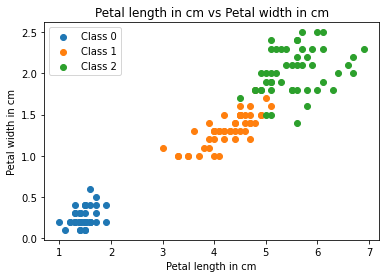

In [50]:
#Scatter plot of the data asigning each point to the cluster it belongs to ¡¡
df1 = dataset1[dataset1.Class==0]
df2 = dataset1[dataset1.Class==1]
df3 = dataset1[dataset1.Class==2]

plt.scatter(df1.Petal_length_in_cm, df1.Petal_width_in_cm, Label='Class 0')
plt.scatter(df2.Petal_length_in_cm, df2.Petal_width_in_cm, Label='Class 1')
plt.scatter(df3.Petal_length_in_cm, df3.Petal_width_in_cm, Label='Class 2')

plt.title('Petal length in cm vs Petal width in cm')
plt.xlabel('Petal length in cm')
plt.ylabel('Petal width in cm')
plt.legend()
plt.show()

<ipython-input-52-0da686862e37>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df21.Sepal_length_in_cm, df21.Sepal_width_in_cm, Label='Estimated Class 1')
<ipython-input-52-0da686862e37>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df22.Sepal_length_in_cm, df22.Sepal_width_in_cm, Label='Estimated Class 2')
<ipython-input-52-0da686862e37>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df23.Sepal_length_in_cm, df23.Sepal_width_in_cm, Label='Estimated Class 3')


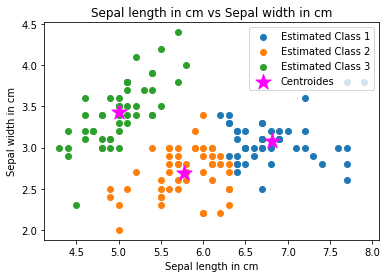

In [52]:
df21 = dataset2[dataset2.Cluster2==0]
df22 = dataset2[dataset2.Cluster2==1]
df23 = dataset2[dataset2.Cluster2==2]

plt.scatter(df21.Sepal_length_in_cm, df21.Sepal_width_in_cm, Label='Estimated Class 1')
plt.scatter(df22.Sepal_length_in_cm, df22.Sepal_width_in_cm, Label='Estimated Class 2')
plt.scatter(df23.Sepal_length_in_cm, df23.Sepal_width_in_cm, Label='Estimated Class 3')

plt.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('Sepal length in cm vs Sepal width in cm')
plt.xlabel('Sepal length in cm')
plt.ylabel('Sepal width in cm')
plt.legend()
plt.show()

<ipython-input-53-fa02f7573215>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df21.Sepal_length_in_cm, df21.Sepal_width_in_cm, Label='Class 0')
<ipython-input-53-fa02f7573215>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df22.Sepal_length_in_cm, df22.Sepal_width_in_cm, Label='Class 1')
<ipython-input-53-fa02f7573215>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df23.Sepal_length_in_cm, df23.Sepal_width_in_cm, Label='Class 2')


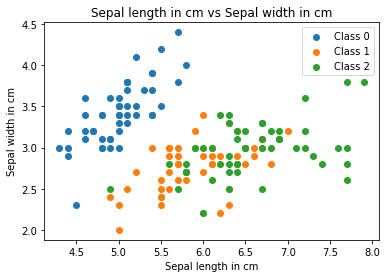

In [53]:
#Scatter plot of the data asigning each point to the cluster it belongs to ¡¡
df21 = dataset2[dataset2.Class==0]
df22 = dataset2[dataset2.Class==1]
df23 = dataset2[dataset2.Class==2]

plt.scatter(df21.Sepal_length_in_cm, df21.Sepal_width_in_cm, Label='Class 0')
plt.scatter(df22.Sepal_length_in_cm, df22.Sepal_width_in_cm, Label='Class 1')
plt.scatter(df23.Sepal_length_in_cm, df23.Sepal_width_in_cm, Label='Class 2')

plt.title('Sepal length in cm vs Sepal width in cm')
plt.xlabel('Sepal length in cm')
plt.ylabel('Sepal width in cm')
plt.legend()
plt.show()

<ipython-input-54-ba25b3b9ad6a>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df31.Sepal_length_in_cm, df31.Sepal_width_in_cm, df31.Petal_length_in_cm, df31.Petal_width_in_cm, Label='Class 0')
<ipython-input-54-ba25b3b9ad6a>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df32.Sepal_length_in_cm, df32.Sepal_width_in_cm, df32.Petal_length_in_cm, df32.Petal_width_in_cm, Label='Class 1')
<ipython-input-54-ba25b3b9ad6a>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df33.Sepal_length_in_cm, df33.Sepal_width_in_cm, df33.Petal_length_in_cm, df33.Petal_width_in_cm,Label='Class 2')


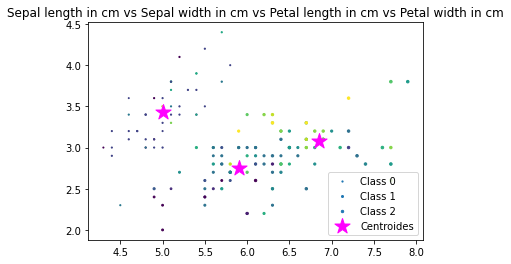

In [54]:
df31 = dataset3[dataset3.Class==0]
df32 = dataset3[dataset3.Class==1]
df33 = dataset3[dataset3.Class==2]

plt.scatter(df31.Sepal_length_in_cm, df31.Sepal_width_in_cm, df31.Petal_length_in_cm, df31.Petal_width_in_cm, Label='Class 0')
plt.scatter(df32.Sepal_length_in_cm, df32.Sepal_width_in_cm, df32.Petal_length_in_cm, df32.Petal_width_in_cm, Label='Class 1')
plt.scatter(df33.Sepal_length_in_cm, df33.Sepal_width_in_cm, df33.Petal_length_in_cm, df33.Petal_width_in_cm,Label='Class 2')


plt.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('Sepal length in cm vs Sepal width in cm vs Petal length in cm vs Petal width in cm')
plt.legend()
plt.show()

# Selecting K: elbow plot

In [60]:
sse1 = []
k_rng1 = range(1,10)
for k in k_rng1:
    km1 = KMeans(n_clusters=k)
    km1.fit_predict(dataset1[['Petal_length_in_cm','Petal_width_in_cm']])
    sse1.append(km1.inertia_)

C:\Users\natis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [61]:
sse2 = []
k_rng2 = range(1,10)
for k in k_rng2:
    km2 = KMeans(n_clusters=k)
    km2.fit_predict(dataset2[['Sepal_length_in_cm','Sepal_width_in_cm']])
    sse2.append(km2.inertia_)

C:\Users\natis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [62]:
sse3 = []
k_rng3 = range(1,10)
for k in k_rng3:
    km3 = KMeans(n_clusters=k)
    km3.fit_predict(dataset3[['Petal_length_in_cm','Petal_width_in_cm', 'Sepal_length_in_cm','Sepal_width_in_cm']])
    sse3.append(km3.inertia_)

C:\Users\natis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


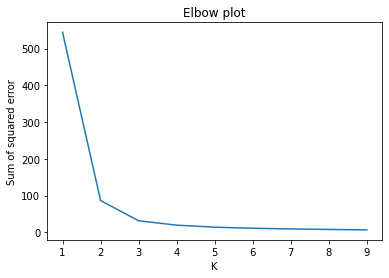

In [63]:
plt.plot(k_rng1,sse1)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

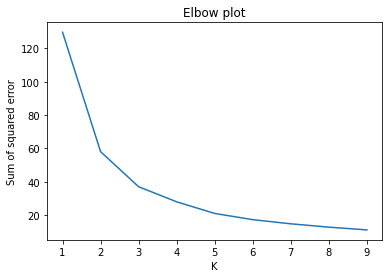

In [64]:
plt.plot(k_rng2,sse2)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

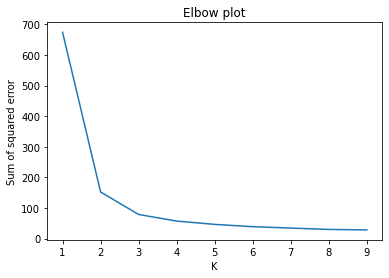

In [65]:
plt.plot(k_rng3,sse3)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()